In [2]:
# Main libraries for handling data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ***Introduction***

In [123]:
# Importing dataset and dropping column that repeats index
df = pd.read_csv("train.csv")
df.drop(columns="Unnamed: 0",inplace=True)
df.drop(5005,inplace=True)
df.reset_index(inplace=True)
df.drop(columns="index",inplace=True)

In [124]:
# Separating real estate and non real estate loans with a new feature "NumberNonRealEstateLoansOrLines" replacing "NumberOfOpenCreditLinesAndLoans"
df["NumberOfOpenCreditLinesAndLoans"] = df['NumberOfOpenCreditLinesAndLoans']-df['NumberRealEstateLoansOrLines']
df.rename(columns={'NumberOfOpenCreditLinesAndLoans': 'NumberNonRealEstateLoansOrLines'},inplace=True)

In [125]:
# Quick look at the data
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberNonRealEstateLoansOrLines,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,9.031200e+04,112499.000000,112499.000000,112499.000000,112499.000000,109554.000000
mean,0.066845,6.264249,52.468573,0.421346,353.836220,6.328080e+03,7.444751,0.266767,1.018222,0.240678,0.757654
std,0.249755,259.630969,14.798620,4.196468,2153.230263,1.413422e+04,4.770808,4.173056,1.133213,4.158773,1.114823
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029677,41.000000,0.000000,0.175078,3.227136e+03,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153515,52.000000,0.000000,0.366291,5.112446e+03,7.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.558293,63.000000,0.000000,0.857619,7.812569e+03,10.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,103.000000,98.000000,329664.000000,2.866006e+06,57.000000,98.000000,54.000000,98.000000,20.000000


In [126]:
# Quick check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112499 entries, 0 to 112498
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      112499 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  112499 non-null  float64
 2   age                                   112499 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  112499 non-null  float64
 4   DebtRatio                             112499 non-null  float64
 5   MonthlyIncome                         90312 non-null   float64
 6   NumberNonRealEstateLoansOrLines       112499 non-null  float64
 7   NumberOfTimes90DaysLate               112499 non-null  float64
 8   NumberRealEstateLoansOrLines          112499 non-null  float64
 9   NumberOfTime60-89DaysPastDueNotWorse  112499 non-null  float64
 10  NumberOfDependents                    109554 non-null  float64
dtype

# ***Exploratory data analysis***

## SeriousDlqin2yrs

In [127]:
df['SeriousDlqin2yrs'].value_counts()/len(df['SeriousDlqin2yrs'])
#Imbalanced classes

SeriousDlqin2yrs
0.0    0.933155
1.0    0.066845
Name: count, dtype: float64

## RevolvingUtilizationOfUnsecuredLines

97.77509133414519% of the observations report values below 1
The remaining values are spread across an extremely wide range


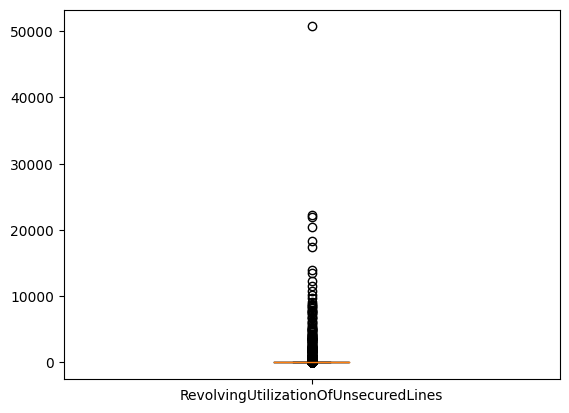

In [128]:
# Boxplot of RevolvingUtilizationOfUnsecuredLines
plt.boxplot(df["RevolvingUtilizationOfUnsecuredLines"])
plt.xticks([1], [df["RevolvingUtilizationOfUnsecuredLines"].name])
print(f"{(len(df[df['RevolvingUtilizationOfUnsecuredLines']<=1])/len(df))*100}% of the observations report values below 1")
print(f"The remaining values are spread across an extremely wide range")

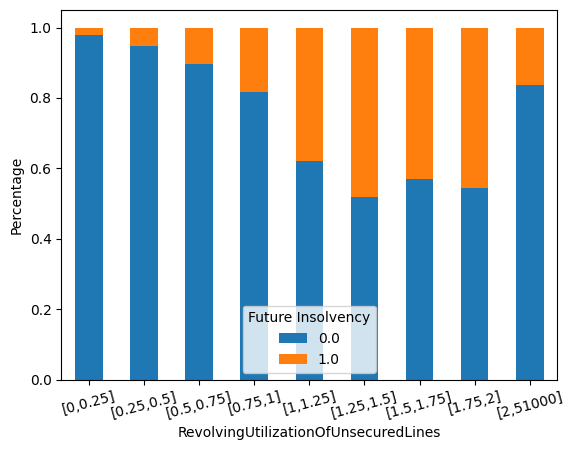

In each bin there are the following number of observations
SeriousDlqin2yrs    0.0   1.0
interval                     
[0.0, 0.25)       64372  1402
[0.25, 0.5)       14951   825
[0.5, 0.75)        9318  1080
[0.75, 1.0)       14751  3285
[1.0, 1.25)        1120   682
[1.25, 1.5)         131   121
[1.5, 1.75)          65    49
[1.75, 2.0)          36    30
[2.0, 51000.0)      235    46


In [129]:
#Plotting the "risk" of future insolvency for observations with different values of RevolvingUtilizationOfUnsecuredLines
copy = df.copy()
copy['interval'] = pd.cut(df['RevolvingUtilizationOfUnsecuredLines'], bins=[0,0.25,0.5,0.75,1,1.25,1.5,1.75,2, 51000], right=False)
grouped = copy.groupby(['interval', 'SeriousDlqin2yrs'])
counts = grouped.size().unstack(fill_value=0)
proportions = counts.div(counts.sum(axis=1), axis=0)
intervals = [(0, 0.25),(0.25,0.5),(0.5, 0.75),(0.75,1),(1, 1.25),(1.25,1.5),(1.5, 1.75),(1.75, 2), (2, 51000)]
proportions.plot(kind='bar', stacked=True)
plt.xlabel('RevolvingUtilizationOfUnsecuredLines')
plt.ylabel('Percentage')
plt.xticks(range(len(intervals)), [f'[{interval[0]},{interval[1]}]' for interval in intervals],rotation=15)
plt.legend(title='Future Insolvency',loc='lower center')
plt.show()
print("In each bin there are the following number of observations")
print(counts)

## Age

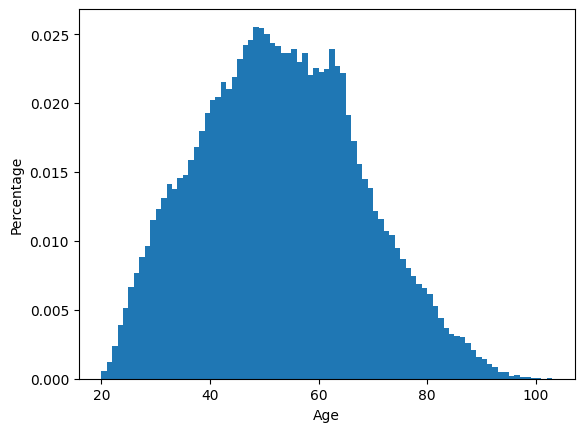

In [130]:
# Plot of age excluding observation with negative value
plt.hist(df[df["age"]>0]["age"],bins=83,density=True)
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.show()

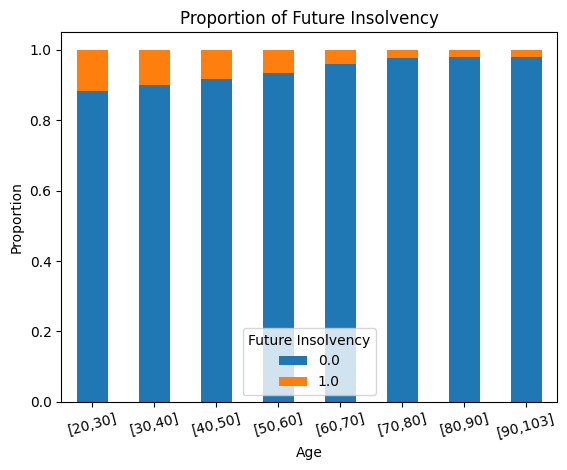

In each bin there are the following number of observations
SeriousDlqin2yrs    0.0   1.0
interval                     
[20, 30)           5722   752
[30, 40)          15451  1723
[40, 50)          23559  2090
[50, 60)          24767  1767
[60, 70)          20945   849
[70, 80)          10094   252
[80, 90)           3881    75
[90, 103)           559    12


In [131]:
#Plotting the "risk" of future insolvency for observations with different values of Age
copy = df.copy()
copy['interval'] = pd.cut(df['age'], bins=[20,30,40,50,60,70,80,90, 103], right=False)
grouped = copy.groupby(['interval', 'SeriousDlqin2yrs'])
counts = grouped.size().unstack(fill_value=0)
proportions = counts.div(counts.sum(axis=1), axis=0)
intervals = [(20, 30),(30,40),(40,50),(50,60),(60,70),(70,80),(80,90),(90, 103)]
proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of Future Insolvency')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.xticks(range(len(intervals)), [f'[{interval[0]},{interval[1]}]' for interval in intervals],rotation=15)
plt.legend(title='Future Insolvency',loc='lower center')
plt.show()
print("In each bin there are the following number of observations")
print(counts)

## Past Insolvency: NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate

In [132]:
# Counts for the values related to past insolvency
insolvency3059 = df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().sort_index()
insolvency6089 = df["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_index()
insolvency90 = df["NumberOfTimes90DaysLate"].value_counts().sort_index()
print("Counts of past insolvency")
print(insolvency3059,insolvency6089,insolvency90)

Counts of past insolvency
NumberOfTime30-59DaysPastDueNotWorse
0.0     94474
1.0     12076
2.0      3447
3.0      1330
4.0       535
5.0       252
6.0       104
7.0        41
8.0        22
9.0         8
10.0        4
11.0        1
12.0        2
13.0        1
96.0        1
98.0      201
Name: count, dtype: int64 NumberOfTime60-89DaysPastDueNotWorse
0.0     106774
1.0       4330
2.0        828
3.0        241
4.0         78
5.0         27
6.0         11
7.0          7
11.0         1
96.0         1
98.0       201
Name: count, dtype: int64 NumberOfTimes90DaysLate
0.0     106203
1.0       3956
2.0       1170
3.0        516
4.0        230
5.0         89
6.0         59
7.0         27
8.0         15
9.0         14
10.0         6
11.0         3
12.0         1
13.0         3
14.0         2
15.0         2
17.0         1
96.0         1
98.0       201
Name: count, dtype: int64


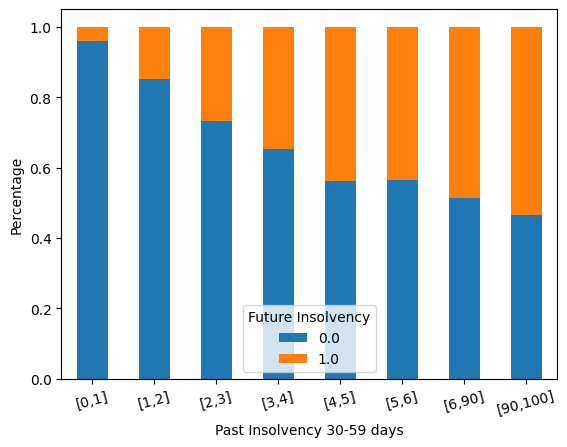

In each bin there are the following number of observations
SeriousDlqin2yrs    0.0   1.0
interval                     
[0, 1)            90661  3813
[1, 2)            10292  1784
[2, 3)             2528   919
[3, 4)              867   463
[4, 5)              301   234
[5, 6)              142   110
[6, 90)              94    89
[90, 100)            94   108


In [133]:
#Plotting the "risk" of future insolvency for observations with different values of NumberOfTime30-59DaysPastDueNotWorse
copy = df.copy()
copy['interval'] = pd.cut(df['NumberOfTime30-59DaysPastDueNotWorse'], bins=[0,1,2,3,4,5,6,90,100], right=False)
grouped = copy.groupby(['interval', 'SeriousDlqin2yrs'])
counts = grouped.size().unstack(fill_value=0)
proportions = counts.div(counts.sum(axis=1), axis=0)
intervals = [(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,90),(90, 100)]
proportions.plot(kind='bar', stacked=True)
plt.xlabel('Past Insolvency 30-59 days')
plt.ylabel('Percentage')
plt.xticks(range(len(intervals)), [f'[{interval[0]},{interval[1]}]' for interval in intervals],rotation=15)
plt.legend(title='Future Insolvency',loc='lower center')
plt.show()
print("In each bin there are the following number of observations")
print(counts)

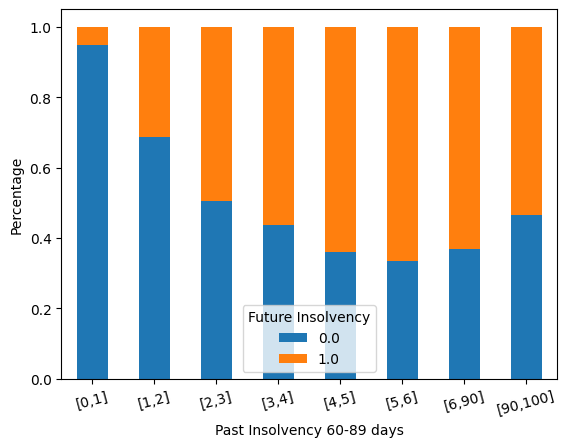

In each bin there are the following number of observations
SeriousDlqin2yrs     0.0   1.0
interval                      
[0, 1)            101339  5435
[1, 2)              2978  1352
[2, 3)               419   409
[3, 4)               105   136
[4, 5)                28    50
[5, 6)                 9    18
[6, 90)                7    12
[90, 100)             94   108


In [134]:
#Plotting the "risk" of future insolvency for observations with different values of NumberOfTime60-89DaysPastDueNotWorse
copy = df.copy()
copy['interval'] = pd.cut(df['NumberOfTime60-89DaysPastDueNotWorse'], bins=[0,1,2,3,4,5,6,90,100], right=False)
grouped = copy.groupby(['interval', 'SeriousDlqin2yrs'])
counts = grouped.size().unstack(fill_value=0)
proportions = counts.div(counts.sum(axis=1), axis=0)
intervals = [(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,90),(90, 100)]
proportions.plot(kind='bar', stacked=True)
plt.xlabel('Past Insolvency 60-89 days')
plt.ylabel('Percentage')
plt.xticks(range(len(intervals)), [f'[{interval[0]},{interval[1]}]' for interval in intervals],rotation=15)
plt.legend(title='Future Insolvency',loc='lower center')
plt.show()
print("In each bin there are the following number of observations")
print(counts)

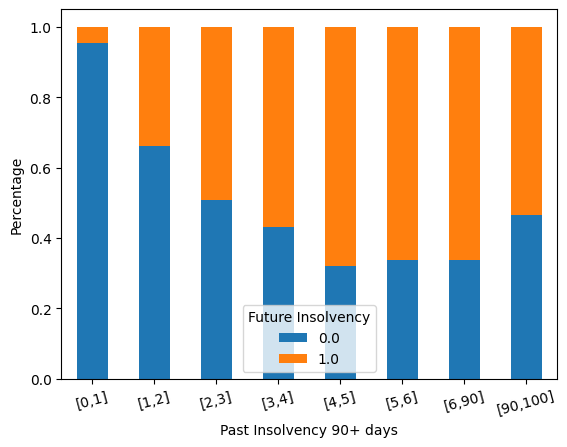

In each bin there are the following number of observations
SeriousDlqin2yrs     0.0   1.0
interval                      
[0, 1)            101304  4899
[1, 2)              2615  1341
[2, 3)               594   576
[3, 4)               223   293
[4, 5)                74   156
[5, 6)                30    59
[6, 90)               45    88
[90, 100)             94   108


In [135]:
#Plotting the "risk" of future insolvency for observations with different values of NumberOfTimes90DaysLate
copy = df.copy()
copy['interval'] = pd.cut(df['NumberOfTimes90DaysLate'], bins=[0,1,2,3,4,5,6,90,100], right=False)
grouped = copy.groupby(['interval', 'SeriousDlqin2yrs'])
counts = grouped.size().unstack(fill_value=0)
proportions = counts.div(counts.sum(axis=1), axis=0)
intervals = [(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,90),(90, 100)]
proportions.plot(kind='bar', stacked=True)
plt.xlabel('Past Insolvency 90+ days')
plt.ylabel('Percentage')
plt.xticks(range(len(intervals)), [f'[{interval[0]},{interval[1]}]' for interval in intervals],rotation=15)
plt.legend(title='Future Insolvency',loc='lower center')
plt.show()
print("In each bin there are the following number of observations")
print(counts)

## DebtRatio

76.69490395470181% of the observations report values below 1
4.168037049218215% of the observations report values between 1 and 10
89.38810810810811% of the observations reporting values higher than 2 do not have the income
The remaining values are spread across an extremely wide range


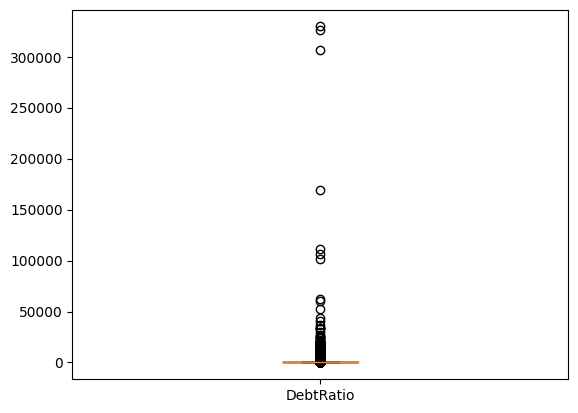

In [136]:
# Boxplot of DebtRatio
plt.boxplot(df["DebtRatio"])
plt.xticks([1], [df["DebtRatio"].name])
print(f"{(len(df[df['DebtRatio']<=1])/len(df))*100}% of the observations report values below 1")
print(f"{(len(df[(df['DebtRatio']<=10)&(df['DebtRatio']>1)])/len(df))*100}% of the observations report values between 1 and 10")
a = len(df[(df['DebtRatio'] > 2)&(df['MonthlyIncome'].isna())])
b = len(df[df["DebtRatio"]>2])
print(f"{(a/b)*100}% of the observations reporting values higher than 2 do not have the income")
print(f"The remaining values are spread across an extremely wide range")

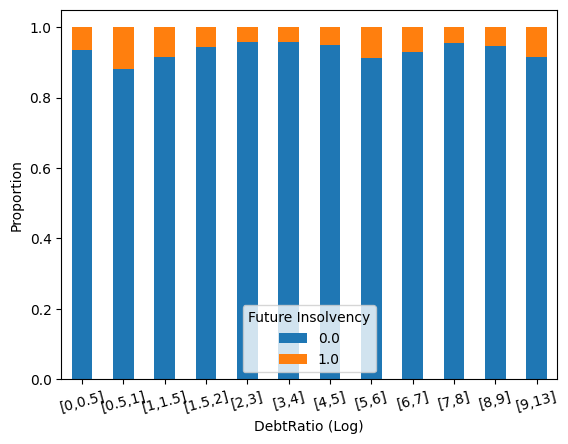

In each bin there are the following number of observations
SeriousDlqin2yrs    0.0   1.0
interval                     
[0.0, 0.5)        73884  5023
[0.5, 1.0)         8893  1183
[1.0, 1.5)          947    86
[1.5, 2.0)          502    30
[2.0, 3.0)         1062    47
[3.0, 4.0)         1501    66
[4.0, 5.0)         1557    82
[5.0, 6.0)         1509   144
[6.0, 7.0)         3591   266
[7.0, 8.0)         7790   373
[8.0, 9.0)         3512   199
[9.0, 13.0)         231    21


In [137]:
#Plotting the "risk" of future insolvency for observations with different values of DebtRatio
copy = df.copy()
copy['interval'] = pd.cut(np.log(df['DebtRatio']+1), bins=[0,0.5,1,1.5,2,3,4,5,6,7,8,9,13], right=False)
grouped = copy.groupby(['interval', 'SeriousDlqin2yrs'])
counts = grouped.size().unstack(fill_value=0)
proportions = counts.div(counts.sum(axis=1), axis=0)
intervals = [(0,0.5),(0.5,1),(1,1.5),(1.5,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,13)]
proportions.plot(kind='bar', stacked=True)
plt.xlabel("DebtRatio (Log)")
plt.ylabel('Proportion')
plt.xticks(range(len(intervals)), [f'[{interval[0]},{interval[1]}]' for interval in intervals],rotation=15)
plt.legend(title='Future Insolvency',loc='lower center')
plt.show()
print("In each bin there are the following number of observations")
print(counts)

## MonthlyIncome

19.72195308402741% of the observations don't report the income
93.16716996439357% of the observations that don't report the income have a DebtRatio higher than 2


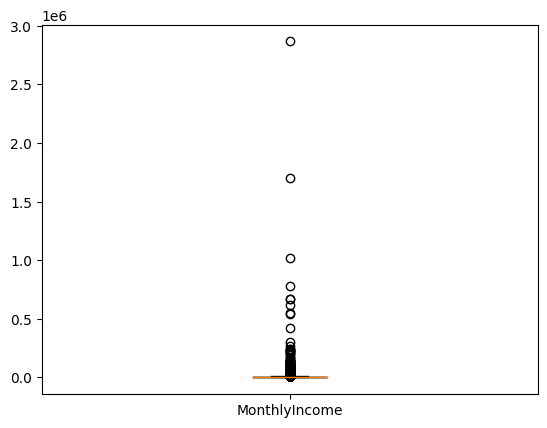

In [138]:
# Boxplot of MonthlyIncome
plt.boxplot(df["MonthlyIncome"].dropna())
plt.xticks([1], [df["MonthlyIncome"].name])
not_missing = df.dropna()
missing_income = df[df["MonthlyIncome"].isna()]
print(f"{(1-len(not_missing)/len(df))*100}% of the observations don't report the income")
print(f"{len(missing_income[missing_income['DebtRatio']>2])/len(missing_income)*100}% of the observations that don't report the income have a DebtRatio higher than 2")


Text(0.5, 0, 'MonthlyIncome (Log)')

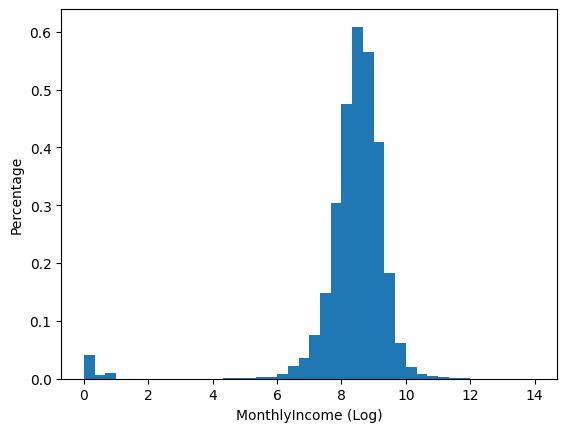

In [139]:
# Histogram of MonthlyIncome
plt.hist(np.log(df["MonthlyIncome"]+1),bins=list(np.linspace(0,14,43)),density=True)
plt.ylabel("Percentage")
plt.xlabel("MonthlyIncome (Log)")

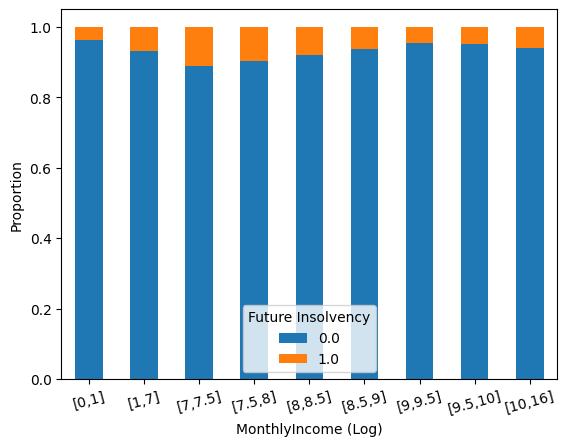

In each bin there are the following number of observations
SeriousDlqin2yrs    0.0   1.0
interval                     
[0.0, 1.0)         1630    62
[1.0, 7.0)         2092   156
[7.0, 7.5)         3419   425
[7.5, 8.0)        10865  1173
[8.0, 8.5)        21507  1896
[8.5, 9.0)        24664  1616
[9.0, 9.5)        15084   713
[9.5, 10.0)        3718   185
[10.0, 16.0)       1042    65


In [140]:
#Plotting the "risk" of future insolvency for observations with different values of MonthlyIncome
copy = df.copy()
copy['interval'] = pd.cut(np.log(df['MonthlyIncome']+1), bins=[0,1,7,7.5,8,8.5,9,9.5,10,16], right=False)
grouped = copy.groupby(['interval', 'SeriousDlqin2yrs'])
counts = grouped.size().unstack(fill_value=0)
proportions = counts.div(counts.sum(axis=1), axis=0)
intervals = [(0,1),(1,7),(7,7.5),(7.5,8),(8,8.5),(8.5,9),(9,9.5),(9.5,10),(10,16)]
proportions.plot(kind='bar', stacked=True)
plt.xlabel('MonthlyIncome (Log)')
plt.ylabel('Proportion')
plt.xticks(range(len(intervals)), [f'[{interval[0]},{interval[1]}]' for interval in intervals],rotation=15)
plt.legend(title='Future Insolvency',loc='lower center')
plt.show()
print("In each bin there are the following number of observations")
print(counts)

## NumberNonRealEstateLoansOrLines and NumberRealEstateLoansOrLines

Text(0, 0.5, 'Percentage')

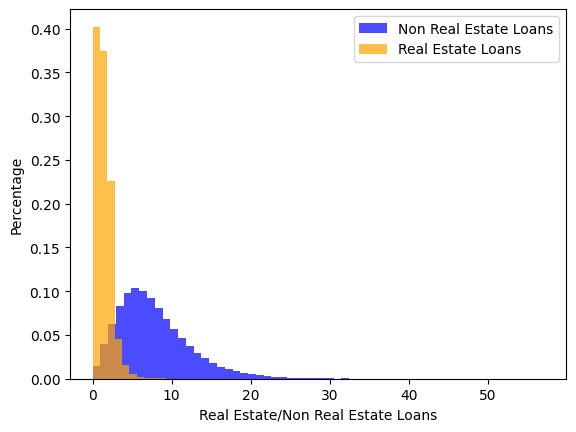

In [141]:
# Histogram of NumberNonRealEstateLoansOrLines and NumberRealEstateLoansOrLines
plt.hist(df['NumberNonRealEstateLoansOrLines'], bins=58, color='blue', density=True, alpha=0.7, label='Non Real Estate Loans')
plt.hist(df['NumberRealEstateLoansOrLines'], bins=58, color='orange', density=True, alpha=0.7, label='Real Estate Loans')
plt.legend()
plt.xlabel("Real Estate/Non Real Estate Loans")
plt.ylabel("Percentage")

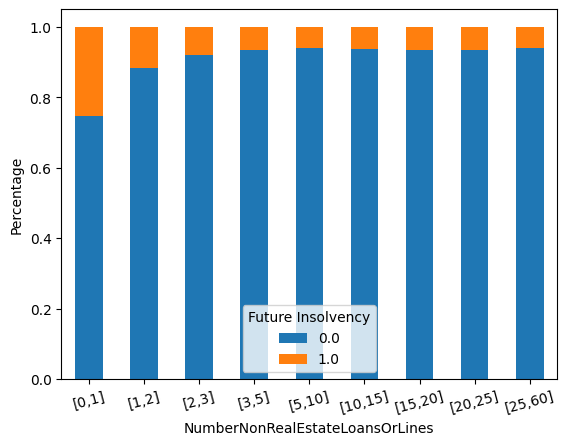

In each bin there are the following number of observations
SeriousDlqin2yrs    0.0   1.0
interval                     
[0, 1)             1244   423
[1, 2)             3851   510
[2, 3)             6348   557
[3, 5)            18736  1280
[5, 10)           46231  2864
[10, 15)          20094  1304
[15, 20)           6140   422
[20, 25)           1700   120
[25, 60)            635    40


In [142]:
#Plotting the "risk" of future insolvency for observations with different values of NumberNonRealEstateLoansOrLines
copy = df.copy()
copy['interval'] = pd.cut(df['NumberNonRealEstateLoansOrLines'], bins=[0,1,2,3,5,10,15,20,25,60], right=False)
grouped = copy.groupby(['interval', 'SeriousDlqin2yrs'])
counts = grouped.size().unstack(fill_value=0)
proportions = counts.div(counts.sum(axis=1), axis=0)
intervals = [(0,1),(1,2),(2,3),(3,5),(5,10),(10,15),(15,20),(20,25),(25,60)]
proportions.plot(kind='bar', stacked=True)
plt.xlabel("NumberNonRealEstateLoansOrLines")
plt.ylabel('Percentage')
plt.xticks(range(len(intervals)), [f'[{interval[0]},{interval[1]}]' for interval in intervals],rotation=15)
plt.legend(title='Future Insolvency',loc='lower center')
plt.show()
print("In each bin there are the following number of observations")
print(counts)

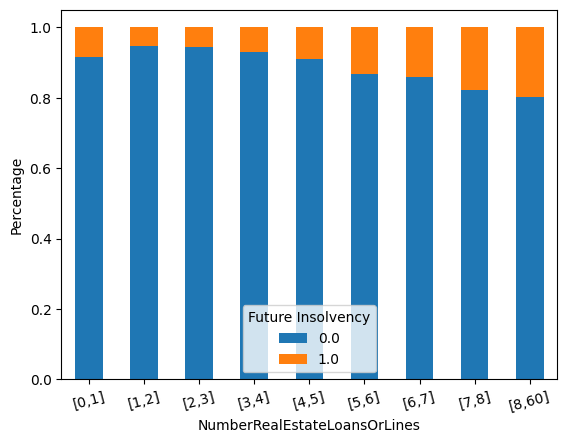

In each bin there are the following number of observations
SeriousDlqin2yrs    0.0   1.0
interval                     
[0, 1)            38637  3495
[1, 2)            37200  2055
[2, 3)            22348  1328
[3, 4)             4380   329
[4, 5)             1459   142
[5, 6)              461    70
[6, 7)              209    34
[7, 8)              110    24
[8, 60)             175    43


In [143]:
#Plotting the "risk" of future insolvency for observations with different values of NumberRealEstateLoansOrLines
copy = df.copy()
copy['interval'] = pd.cut(df['NumberRealEstateLoansOrLines'], bins=[0,1,2,3,4,5,6,7,8,60], right=False)
grouped = copy.groupby(['interval', 'SeriousDlqin2yrs'])
counts = grouped.size().unstack(fill_value=0)
proportions = counts.div(counts.sum(axis=1), axis=0)
intervals = [(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,60)]
proportions.plot(kind='bar', stacked=True)
plt.xlabel("NumberRealEstateLoansOrLines")
plt.ylabel('Percentage')
plt.xticks(range(len(intervals)), [f'[{interval[0]},{interval[1]}]' for interval in intervals],rotation=15)
plt.legend(title='Future Insolvency',loc='lower center')
plt.show()
print("In each bin there are the following number of observations")
print(counts)

## NumberOfDependents

In [144]:
#Counts of NumberOfDependents
print(f"{len(df[df['NumberOfDependents'].isna()])/len(df)*100}% of the observations don't report the NumberOfDependents")
print("Counts of non-missing values")
df['NumberOfDependents'].value_counts().sort_index()

2.6178010471204187% of the observations don't report the NumberOfDependents
Counts of non-missing values


NumberOfDependents
0.0     65107
1.0     19817
2.0     14643
3.0      7083
4.0      2166
5.0       555
6.0       119
7.0        38
8.0        17
9.0         3
10.0        5
20.0        1
Name: count, dtype: int64

Text(0, 0.5, 'Percentage')

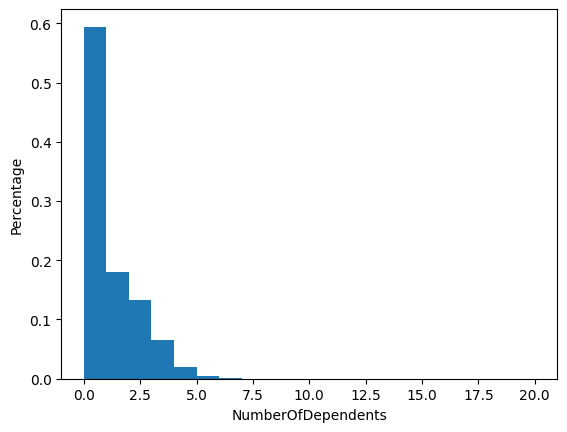

In [145]:
# Histogram of non missing values of NumberOfDependents
plt.hist(df['NumberOfDependents'],bins=20,density=True)
plt.xlabel("NumberOfDependents")
plt.ylabel("Percentage")

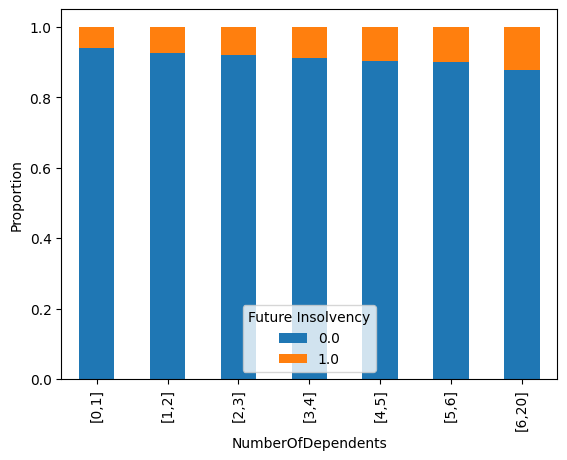

In each bin there are the following number of observations
SeriousDlqin2yrs    0.0   1.0
interval                     
[0, 1)            61280  3827
[1, 2)            18355  1462
[2, 3)            13458  1185
[3, 4)             6456   627
[4, 5)             1955   211
[5, 6)              500    55
[6, 20)             160    22


In [146]:
#Plotting the "risk" of future insolvency for observations with different values of NumberOfDependents
copy = df.copy()
copy['interval'] = pd.cut(copy['NumberOfDependents'], bins=[0,1,2,3,4,5,6,20], right=False)
grouped = copy.groupby(['interval', 'SeriousDlqin2yrs'])
counts = grouped.size().unstack(fill_value=0)
proportions = counts.div(counts.sum(axis=1), axis=0)
intervals = [(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,20)]
proportions.plot(kind='bar', stacked=True)
plt.xlabel('NumberOfDependents')
plt.ylabel('Proportion')
plt.xticks(range(len(intervals)), [f'[{interval[0]},{interval[1]}]' for interval in intervals])
plt.legend(title='Future Insolvency',loc='lower center')
plt.show()
print("In each bin there are the following number of observations")
print(counts)

# ***Imputation***

## Preprocessing and Imputation

In [147]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [148]:
# Defining a custom function for rescaling and its inverse: only the values larger than the threshold will be rescaled using the logarithm
def replace_values_log(original,threshold):
    if original > threshold:
        return  np.log(np.exp(threshold) + original - threshold)
    else:
        return original

def inverse_replace_values_log(transformed, threshold):
    if transformed <= threshold:
        return transformed
    else:
        return np.exp(transformed) + threshold - np.exp(threshold)

In [149]:
# Applying custom rescaling to RevolvingUtilizationOfUnsecuredLines and DebtRatio, and just the logarithm to MonthlyIncome
df_imputation = df.copy()
df_imputation['RevolvingUtilizationOfUnsecuredLines'] = df_imputation['RevolvingUtilizationOfUnsecuredLines'].apply(replace_values_log,args=(2,))
df_imputation["DebtRatio"] = df_imputation["DebtRatio"].apply(replace_values_log,args=(2,))
df_imputation["MonthlyIncome"] = np.log(df_imputation["MonthlyIncome"]+1)

In [150]:
# Bringing all the features within the same range
scaler = MinMaxScaler(feature_range=(0,100))
df_imputation = pd.DataFrame(scaler.fit_transform(df_imputation),columns=df_imputation.columns,index=df_imputation.index)

In [151]:
# Performing imputation
imputer = KNNImputer(n_neighbors=335,weights="distance")
missing_income_indices = df_imputation[df_imputation["MonthlyIncome"].isna()].index
missing_dependents_indices = df_imputation[df_imputation["NumberOfDependents"].isna()].index
df_imputed = pd.DataFrame(imputer.fit_transform(df_imputation),columns=df_imputation.columns,index=df_imputation.index)

In [152]:
# Applying inverse min max rescaling
df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed),columns=df_imputed.columns,index=df_imputed.index)

In [153]:
# Aplying inverse of custom rescaling
df_imputed['RevolvingUtilizationOfUnsecuredLines'] = df_imputed['RevolvingUtilizationOfUnsecuredLines'].apply(inverse_replace_values_log, args=(2,))
df_imputed['DebtRatio'] = df_imputed['DebtRatio'].apply(inverse_replace_values_log, args=(2,))
df_imputed["MonthlyIncome"] = np.exp(df_imputed["MonthlyIncome"])-1

## Evaluation of imputed values

In [156]:
df_imputed.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberNonRealEstateLoansOrLines,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,1.124990e+05,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000
mean,0.066845,6.264249,52.468573,0.421346,353.836220,5.134821e+03,7.444751,0.266767,1.018222,0.240678,0.744642
std,0.249755,259.630969,14.798620,4.196468,2153.230263,1.289894e+04,4.770808,4.173056,1.133213,4.158773,1.103631
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029677,41.000000,0.000000,0.175078,1.711122e+03,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153515,52.000000,0.000000,0.366291,4.184856e+03,7.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.558293,63.000000,0.000000,0.857619,7.022994e+03,10.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,103.000000,98.000000,329664.000000,2.866006e+06,57.000000,98.000000,54.000000,98.000000,20.000000


Text(0, 0.5, 'Percentage')

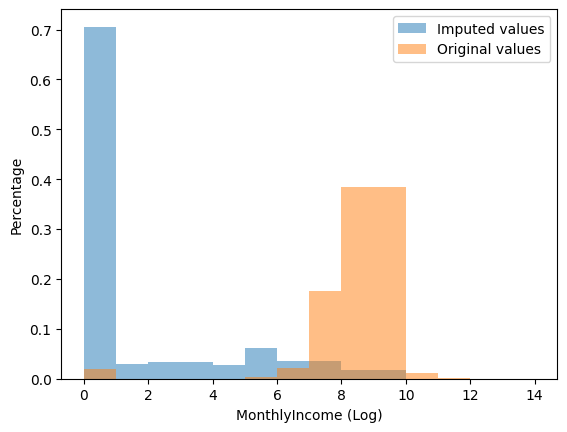

In [157]:
# Histogram of MonthlyIncome
plt.hist(np.log(df_imputed.loc[missing_income_indices,"MonthlyIncome"]+1),density=True,bins=[0,1,2,3,4,5,6,7,8,10,11,12,13,14], alpha=0.5, label='Imputed values')
plt.hist(np.log(df["MonthlyIncome"]+1),density=True,bins=[0,1,2,3,4,5,6,7,8,10,11,12,13,14], alpha=0.5, label='Original values')
plt.legend()
plt.xlabel("MonthlyIncome (Log)")
plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

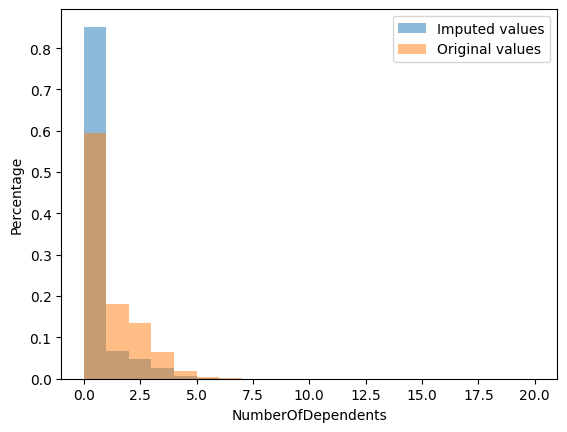

In [158]:
# Histogram of NumberOfDependents
plt.hist(df_imputed.loc[missing_income_indices,"NumberOfDependents"],density=True,bins=[0,1,2,3,4,5,6,7,8,10,20], alpha=0.5, label='Imputed values')
plt.hist(df["NumberOfDependents"],density=True,bins=[0,1,2,3,4,5,6,7,8,10,20], alpha=0.5, label='Original values')
plt.legend()
plt.xlabel("NumberOfDependents")
plt.ylabel("Percentage")

# ***Models***

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

## Features Selection

In [194]:
from sklearn.decomposition import PCA

### Correlation Analysis

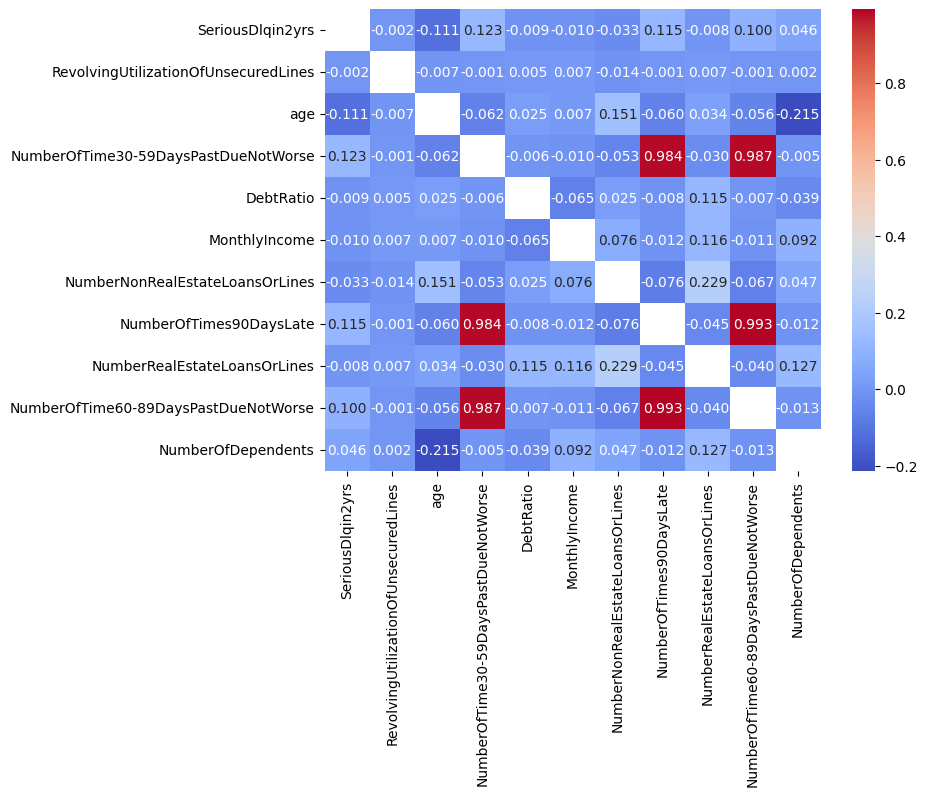

In [174]:
# Plotting linear correlation among variables
plt.figure(figsize=(8, 6))
corr_mat = df_imputed.corr()
np.fill_diagonal(corr_mat.values, np.nan)
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".3f")
plt.show()

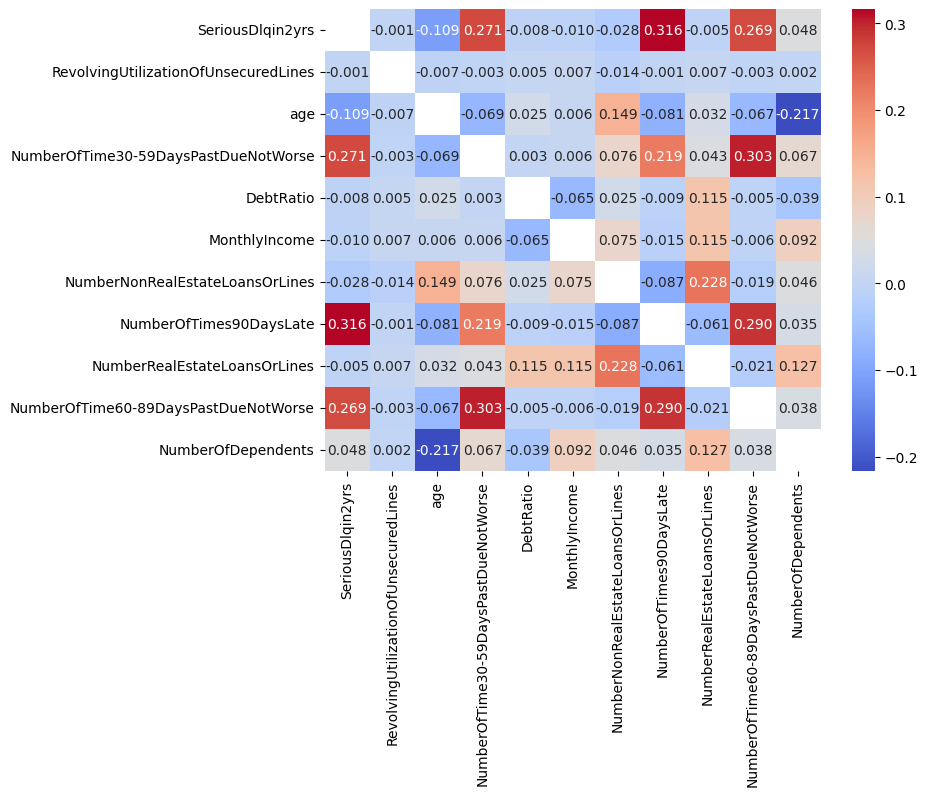

In [175]:
# Plotting linear correlation among variables excluding observations with 96/98 episodes of past insolvency
plt.figure(figsize=(8, 6))
corr_mat = df_imputed[df_imputed["NumberOfTimes90DaysLate"]<90].corr()
np.fill_diagonal(corr_mat.values, np.nan)
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".3f")
plt.show()

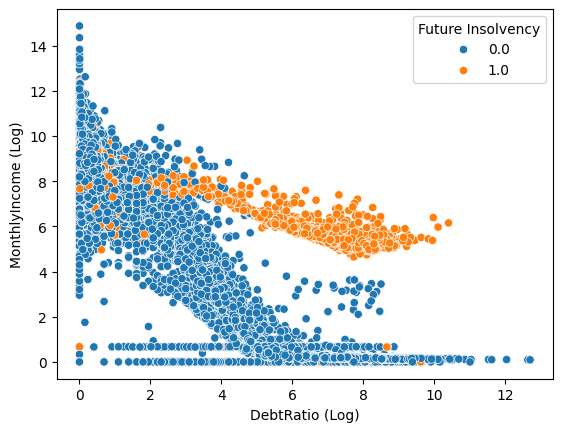

In [182]:
# Scatter plot of DebtRatio and MonthlyIncome
sns.scatterplot(x=np.log(df_imputed["DebtRatio"]+1),y=np.log(df_imputed["MonthlyIncome"]+1),hue=df_imputed["SeriousDlqin2yrs"])
plt.xlabel("DebtRatio (Log)")
plt.ylabel("MonthlyIncome (Log)")
plt.legend(title="Future Insolvency")


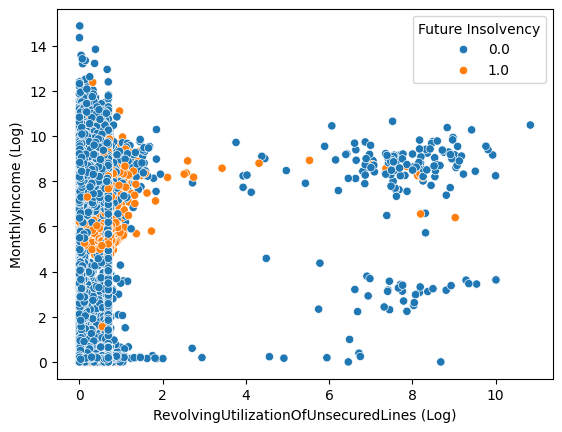

In [184]:
# Scatter plot of RevolvingUtilizationOfUnsecuredLines and MonthlyIncome
sns.scatterplot(x=np.log(df_imputed["RevolvingUtilizationOfUnsecuredLines"]+1),y=np.log(df_imputed["MonthlyIncome"]+1),hue=df_imputed["SeriousDlqin2yrs"])
plt.xlabel("RevolvingUtilizationOfUnsecuredLines (Log)")
plt.ylabel("MonthlyIncome (Log)")
plt.legend(title="Future Insolvency")

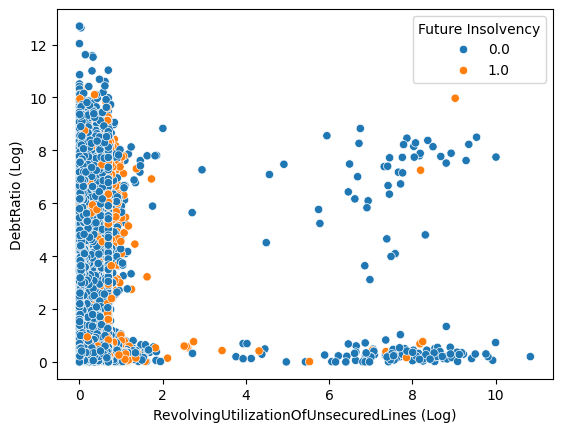

In [187]:
# Scatter plot of RevolvingUtilizationOfUnsecuredLines and DebtRatio
sns.scatterplot(x=np.log(df_imputed["RevolvingUtilizationOfUnsecuredLines"]+1),y=np.log(df_imputed["DebtRatio"]+1),hue=df_imputed["SeriousDlqin2yrs"])
plt.xlabel("RevolvingUtilizationOfUnsecuredLines (Log)")
plt.ylabel("DebtRatio (Log)")
plt.legend(title="Future Insolvency")

### Principal Component Analysis

In [188]:
# Defining a custom function for rescaling: only the values larger than the threshold will be rescaled using the logarithm
def replace_values_log(original,threshold):
    if original > threshold:
        return  np.log(np.exp(threshold) + original - threshold)
    else:
        return original

In [189]:
# Applying custom rescaling to RevolvingUtilizationOfUnsecuredLines and DebtRatio, and just the logarithm to MonthlyIncome
df_clustering = df_imputed.copy()
df_clustering['RevolvingUtilizationOfUnsecuredLines'] = df_clustering['RevolvingUtilizationOfUnsecuredLines'].apply(replace_values_log,args=(2,))
df_clustering["DebtRatio"] = df_clustering["DebtRatio"].apply(replace_values_log,args=(2,))
df_clustering["MonthlyIncome"] = np.log(df_clustering["MonthlyIncome"]+1)

In [190]:
# Normalizing features before applying PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_clustering = pd.DataFrame(scaler.fit_transform(df_clustering),columns=df_clustering.columns,index=df_clustering.index)

In [191]:
df_clustering.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberNonRealEstateLoansOrLines,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1.124990e+05,1.124990e+05,1.124990e+05,1.124990e+05,1.124990e+05,1.124990e+05,1.124990e+05,1.124990e+05,1.124990e+05,1.124990e+05,1.124990e+05
mean,4.118027e-17,-8.210789e-18,1.831638e-18,1.604262e-17,-1.524680e-16,1.566366e-16,5.627548e-17,2.008485e-17,4.402246e-17,3.536955e-18,4.067499e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.676441e-01,-7.207302e-01,-2.194037e+00,-1.004053e-01,-6.076654e-01,-2.247534e+00,-1.560487e+00,-6.392629e-02,-8.985312e-01,-5.787254e-02,-6.747227e-01
25%,-2.676441e-01,-6.564913e-01,-7.749793e-01,-1.004053e-01,-5.405967e-01,1.302502e-01,-7.220508e-01,-6.392629e-02,-8.985312e-01,-5.787254e-02,-6.747227e-01
50%,-2.676441e-01,-3.884318e-01,-3.166343e-02,-1.004053e-01,-4.673469e-01,4.157500e-01,-9.322374e-02,-6.392629e-02,-1.608036e-02,-5.787254e-02,-6.747227e-01
75%,-2.676441e-01,4.877480e-01,7.116524e-01,-1.004053e-01,-2.791290e-01,5.810569e-01,5.356033e-01,-6.392629e-02,8.663705e-01,-5.787254e-02,2.313813e-01
max,3.736305e+00,2.273036e+01,3.414619e+00,2.325267e+01,4.259686e+00,2.500834e+00,1.038723e+01,2.342017e+01,4.675382e+01,2.350687e+01,1.744736e+01


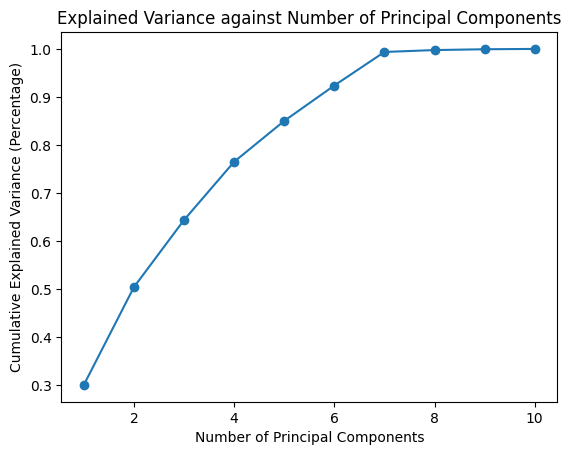

Cumulative explained variance: [0.30071384 0.50424085 0.6439385  0.7651053  0.85015615 0.92384482
 0.99365617 0.99761826 0.99932394 1.        ]


In [192]:
# Plotting the loss against the number of pricipal components
data_pca = df_clustering.drop(columns="SeriousDlqin2yrs")
pca = PCA(n_components=10)
pca.fit(data_pca)
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio,'o-')
plt.title('Explained Variance against Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (Percentage)')
plt.show()
print(f"Cumulative explained variance: {cumulative_explained_variance_ratio}")

## Random Forest



In [196]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
X = df_imputed.drop(columns="SeriousDlqin2yrs")
y = df_imputed["SeriousDlqin2yrs"]

In [197]:
#Default classifier

rf_classifier = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=None, min_samples_split=2,
                                       max_features="sqrt", class_weight=None) # Default parameters

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in cv.split(X, y):

    # Training and test batches for the current fold
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Train the model and get predictions
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

    # AUC, precision, recall and f1 scores for the current fold
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    auc_scores.append(auc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Print Results
print("Cross-validation AUC scores:", auc_scores)
print("Mean AUC score:", np.mean(auc_scores))
print("Standard Deviation AUC score:", np.std(auc_scores))
print("Mean precision score:", np.mean(precision_scores))
print("Mean recall score:", np.mean(recall_scores))
print("Mean f1 score:", np.mean(f1_scores))

Cross-validation AUC scores: [0.8809137879099567, 0.8722712634220094, 0.8741919211815422, 0.8724680777594922, 0.8839300960715064]
Mean AUC score: 0.8767550292689015
Standard Deviation AUC score: 0.00477134131115482
Mean precision score: 0.7037722841637819
Mean recall score: 0.3039893617021277
Mean f1 score: 0.42446555912153255


In [198]:
# Hyperparameters and resampling: here we study the performance of our classifier for different
# choices of hyperparameters and resampling techniques

rf_classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10, min_samples_split=2,
                                       max_features="sqrt")

# Define resampler
# resampler = RandomUnderSampler(sampling_strategy=1)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)
auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in cv.split(X, y):

    # Training and test batches for the current fold
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Resample training bacth
    # X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

    # Train the model and get predicted probabilities
    rf_classifier.fit(X_train, y_train)
    y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
    y_pred = rf_classifier.predict(X_test)

    # AUC score for the current fold
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    auc_scores.append(auc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Print Results
print("Cross-validation AUC scores:", auc_scores)
print("Mean AUC score:", np.mean(auc_scores))
print("Standard Deviation AUC score:", np.std(auc_scores))
print("Mean precision score:", np.mean(precision_scores))
print("Mean recall score:", np.mean(recall_scores))
print("Mean f1 score:", np.mean(f1_scores))

Cross-validation AUC scores: [0.8904395543426711, 0.8990908507648874, 0.8883859875285263, 0.9001201438318546, 0.8978619371126864]
Mean AUC score: 0.8951796947161252
Standard Deviation AUC score: 0.004806724279333554
Mean precision score: 0.7605440162958798
Mean recall score: 0.2715425531914894
Mean f1 score: 0.40009259818944176


In [ ]:
# Features importance: here we study the importance of each feature for our classifier

rf_classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10, min_samples_split=2,
                                       max_features="sqrt")

auc_scores = []
mean_features_importance = []


cv = StratifiedKFold(n_splits=5, shuffle=True)
for train_idx, test_idx in cv.split(X, y):
    # Training and test batches for the current fold
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Train the model and get predicted probabilities
    rf_classifier.fit(X_train, y_train)
    y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

    # Save feature importance
    mean_features_importance.append(rf_classifier.feature_importances_)


# Print Features importance
print("Mean Features Importance:")
for i in range(len(X.columns)):
  print(f"{X.columns[i]}: {np.mean(np.array(mean_features_importance),axis=0)[i]}")

In [ ]:
# Analysis of base trees: here we study the characteristics of the trees (base learners) of our random forests

rf_classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10, min_samples_split=2,
                                       max_features="sqrt")


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
auc_scores = []
base_learners = []

for train_idx, test_idx in cv.split(X, y):

    # Training and test batches for the current fold
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Train the model and get predicted probabilities
    rf_classifier.fit(X_train, y_train)
    y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

    # Save base learners information
    base_learners += list(rf_classifier.estimators_)


# Characteristics of base learners
depth_trees = np.array([tree.tree_.max_depth for tree in base_learners])
num_leaves_trees = np.array([tree.tree_.n_leaves for tree in base_learners])
num_nodes_trees = np.array([tree.tree_.node_count for tree in base_learners])

print(f"Average depth: ",np.mean(depth_trees))
print(f"Average number of leaves: ",np.mean(num_leaves_trees))
print(f"Average number of nodes: ",np.mean(num_nodes_trees))

## XGBoost

In [199]:
from xgboost import XGBClassifier

In [200]:
#Default classifier

xgb_classifier = XGBClassifier(booster="gbtree", n_estimators=100, eta=0.3, max_depth=6, min_child_weight=1,
                               colsample_bynode=1, reg_lambda=1) # Default parameters

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in cv.split(X, y):

    # Training and test batches for the current fold
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Train the model and get predictions
    xgb_classifier.fit(X_train, y_train)
    y_pred = xgb_classifier.predict(X_test)
    y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]

    # AUC, precision, recall and f1 scores for the current fold
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    auc_scores.append(auc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Print Results
print("Cross-validation AUC scores:", auc_scores)
print("Mean AUC score:", np.mean(auc_scores))
print("Standard Deviation AUC score:", np.std(auc_scores))
print("Mean precision score:", np.mean(precision_scores))
print("Mean recall score:", np.mean(recall_scores))
print("Mean f1 score:", np.mean(f1_scores))

Cross-validation AUC scores: [0.8817254293370976, 0.8930642785809253, 0.8880268607394316, 0.8939367693643774, 0.8948310736345534]
Mean AUC score: 0.8903168823312771
Standard Deviation AUC score: 0.004900754122579049
Mean precision score: 0.7058898840681052
Mean recall score: 0.31755319148936173
Mean f1 score: 0.43798814797998425


In [201]:
# Hyperparameters and resampling: here we study the performance of our classifier for different
# choices of hyperparameters and resampling techniques

xgb_classifier = XGBClassifier(booster="gbtree", n_estimators=300, eta=0.05, max_depth=6, min_child_weight=15,
                               colsample_bynode=0.6, reg_lambda=1)

#resampler = RandomOverSampler(sampling_strategy=1)

cv = StratifiedKFold(n_splits=5, shuffle=True)
auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in cv.split(X, y):

    # Training and test batches for the current fold
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Resample training bacth
    #X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

    # Train the model and get predictions
    xgb_classifier.fit(X_train, y_train)
    y_pred = xgb_classifier.predict(X_test)
    y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]

    # AUC, precision, recall and f1 scores for the current fold
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    auc_scores.append(auc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Print Results
print("Cross-validation AUC scores:", auc_scores)
print("Mean AUC score:", np.mean(auc_scores))
print("Standard Deviation AUC score:", np.std(auc_scores))
print("Mean precision score:", np.mean(precision_scores))
print("Mean recall score:", np.mean(recall_scores))
print("Mean f1 score:", np.mean(f1_scores))

Cross-validation AUC scores: [0.8897797592145211, 0.9023564803883618, 0.9009700080917136, 0.8983066651753323, 0.8999626779172346]
Mean AUC score: 0.8982751181574328
Standard Deviation AUC score: 0.004448368827875936
Mean precision score: 0.7385157212221852
Mean recall score: 0.3043882978723404
Mean f1 score: 0.43070881700453567


In [ ]:
# Features importance: here we study the importance of each feature for our classifier

xgb_classifier = XGBClassifier(booster="gbtree", n_estimators=300, eta=0.05, max_depth=6, min_child_weight=15,
                               colsample_bynode=0.6, reg_lambda=1)

auc_scores = []
mean_features_importance = []

for i in range(5):
  cv = StratifiedKFold(n_splits=5, shuffle=True)
  for train_idx, test_idx in cv.split(X, y):
      features_importance_batch = []

      # Training and test batches for the current fold
      X_train, y_train = X.loc[train_idx], y[train_idx]
      X_test, y_test = X.loc[test_idx], y[test_idx]

      # Train the model and get predicted probabilities
      xgb_classifier.fit(X_train, y_train)
      y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]

      # Save feature importance for each batch
      features_importance_batch.append(xgb_classifier.feature_importances_)

  # Save mean features importance for each cross validation
  mean_features_importance.append(np.mean(np.array(features_importance_batch),axis=0))

# Features importance
print("Mean Features Importance:")
for i in range(len(X.columns)):
  print(f"{X.columns[i]}: {np.mean(np.array(mean_features_importance),axis=0)[i]}")

### Hyperparameter Tuning (XGBoost)

In [ ]:
!pip install optuna
import optuna

In [ ]:
# Define objective function
def objective(trial):

    # Define hyperparameters grid
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        "booster": "gbtree",
        'lambda': trial.suggest_uniform('lambda', 0.01,1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.4,0.8),
        'eta': trial.suggest_loguniform('eta', 0.01,0.4),
        'n_estimators': trial.suggest_int("n_estimators",100,400),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 15),
        'random_state': 42
    }

    # Train classifier
    model = XGBClassifier(**params)
    kfold = KFold(n_splits=5, shuffle=True, random_state=23)
    cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

    # Compute AUC
    auc = np.mean(cv_scores)

    return auc

# Run the hyperparameter optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)


## Models' Predictions Comparison

In [ ]:
# Analysis of the difference in predictions: here we analyze how the two classifiers differ in their predictions
# to understand if, by combining them, we can improve the overall performance

# We use the two classifiers with their best settings
rf_classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10, min_samples_split=2,
                                       max_features="sqrt")

xgb_classifier = XGBClassifier(booster="gbtree", n_estimators=300, eta=0.05, max_depth=6, min_child_weight=15,
                               colsample_bynode=0.6, reg_lambda=1)


cv = StratifiedKFold(n_splits=5, shuffle=True)
auc_scores_rf = []
auc_scores_xgb = []
auc_scores_best = []

for train_idx, test_idx in cv.split(X, y):
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Train and get predictions with Random Forest
    rf_classifier.fit(X_train, y_train)
    y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]

    # Train and get predictions with XGBoost
    xgb_classifier.fit(X_train, y_train)
    y_pred_proba_xgb = xgb_classifier.predict_proba(X_test)[:, 1]

    # Save predictions and plot them
    predictions = pd.DataFrame({'RF':y_pred_proba_rf, 'XGB':y_pred_proba_xgb, 'Classes': y_test})
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=predictions, x='RF', y='XGB', hue='Classes')
    plt.xlabel('Probability predicted by RF')
    plt.ylabel('Probability predicted by XGB')
    plt.legend(title='Class')
    plt.show()

    # Save for each instance the best prediction
    error_rf = abs(y_pred_proba_rf-y_test)
    error_xgb = abs(y_pred_proba_xgb-y_test)

    errors = pd.DataFrame({'RF':error_rf, 'XGB':error_xgb, 'Classes': y_test})
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=errors, x='RF', y='XGB', hue='Classes')
    plt.xlabel('Error made by RF')
    plt.ylabel('Error made by XGB')
    plt.show()

    best_pred_proba = []

    for j,index in enumerate(y_test.index):
      if error_rf.loc[index] <= error_xgb.loc[index]:
        best_pred_proba.append(y_pred_proba_rf[j])
      else:
        best_pred_proba.append(y_pred_proba_xgb[j])

    # AUC scores for the current fold
    auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
    auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
    best_auc = roc_auc_score(y_test,best_pred_proba)


    auc_scores_rf.append(auc_rf)
    auc_scores_xgb.append(auc_xgb)
    auc_scores_best.append(best_auc)

# Calculate mean AUC score across folds
print("Mean AUC score RF:", np.mean(auc_scores_rf))
print("Standard Deviation AUC score RF:", np.std(auc_scores_rf))
print("Mean AUC score XGB:", np.mean(auc_scores_xgb))
print("Standard Deviation AUC score XGB:", np.std(auc_scores_xgb))
print("Mean AUC score best predictions:", np.mean(auc_scores_best))
print("Standard Deviation AUC score best predictions:", np.std(auc_scores_best))

In [202]:
# Analysis of the difference in predictions: here we collect for each test instance the two predictions to understand
# whether the two classifiers systematically perform better on certain instances.

# We use the two classifiers with their best settings
rf_classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10, min_samples_split=2,
                                       max_features="sqrt")

xgb_classifier = XGBClassifier(booster="gbtree", n_estimators=300, eta=0.05, max_depth=6, min_child_weight=15,
                               colsample_bynode=0.6, reg_lambda=1)


cv = StratifiedKFold(n_splits=5, shuffle=True)

auc_scores_rf = []
auc_scores_xgb = []

tests = pd.DataFrame(columns = ['RevolvingUtilizationOfUnsecuredLines', 'age',
           'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
           'NumberNonRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
           'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
           'NumberOfDependents', "RF", "XGB", "Best","True"])


for train_idx, test_idx in cv.split(X, y):
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Train and get predictions with Random Forest
    rf_classifier.fit(X_train, y_train)
    y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]

    # Train and get predictions with XGBoost
    xgb_classifier.fit(X_train, y_train)
    y_pred_proba_xgb = xgb_classifier.predict_proba(X_test)[:, 1]


    # Save for each instance the best prediction
    error_rf = abs(y_pred_proba_rf-y_test)
    error_xgb = abs(y_pred_proba_xgb-y_test)
    X_test["RF"] = y_pred_proba_rf
    X_test["XGB"] = y_pred_proba_xgb
    X_test["Best"] = np.argmin(np.vstack((error_rf, error_xgb)), axis=0)
    X_test["True"] = y_test
    tests = pd.concat([tests, X_test], axis=0)


    # AUC scores for the current fold
    auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
    auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
    auc_scores_rf.append(auc_rf)
    auc_scores_xgb.append(auc_xgb)


# Calculate mean AUC score across folds
print("Mean AUC score RF:", np.mean(auc_scores_rf))
print("Standard Deviation AUC score RF:", np.std(auc_scores_rf))
print("Mean AUC score XGB:", np.mean(auc_scores_xgb))
print("Standard Deviation AUC score XGB:", np.std(auc_scores_xgb))

Mean AUC score RF: 0.895258647002826
Standard Deviation AUC score RF: 0.0057717021418539185
Mean AUC score XGB: 0.8982935974075982
Standard Deviation AUC score XGB: 0.0051027005834368925


In [203]:
# Instances better classified by Random Forest
tests[tests["Best"]==0].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberNonRealEstateLoansOrLines,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RF,XGB,True
count,32073.000000,32073.000000,32073.000000,32073.000000,3.207300e+04,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000
mean,7.732723,50.083061,0.578586,223.938618,5.284600e+03,8.198578,0.384810,1.013157,0.354286,0.850654,0.081730,0.091731,0.095781
std,267.979504,15.035844,5.230250,3156.923361,1.737962e+04,5.385635,5.205094,1.356029,5.191131,1.184283,0.121042,0.131427,0.294296
min,0.000000,20.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000034,0.000110,0.000000
25%,0.061547,38.000000,0.000000,0.138300,2.463080e+03,4.000000,0.000000,0.000000,0.000000,0.000000,0.014001,0.016382,0.000000
50%,0.249222,50.000000,0.000000,0.366727,4.089928e+03,7.000000,0.000000,1.000000,0.000000,0.000000,0.030570,0.037056,0.000000
75%,0.657433,61.000000,0.000000,0.688736,6.340019e+03,11.000000,0.000000,2.000000,0.000000,2.000000,0.093661,0.106544,0.000000
max,22198.000000,102.000000,98.000000,329664.000000,2.866006e+06,52.000000,98.000000,32.000000,98.000000,20.000000,0.874978,0.976375,1.000000


In [204]:
# Instances better classified by XGBoost
tests[tests["Best"]==1].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberNonRealEstateLoansOrLines,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RF,XGB,True
count,80426.000000,80426.000000,80426.00000,80426.000000,8.042600e+04,80426.000000,80426.000000,80426.000000,80426.000000,80426.000000,80426.000000,80426.000000,80426.000000
mean,5.678637,53.419889,0.35864,405.637949,5.075091e+03,7.144132,0.219693,1.020242,0.195372,0.702365,0.060307,0.056742,0.055305
std,256.225160,14.594695,3.70278,1581.655588,1.059576e+04,4.466960,3.680652,1.031015,3.665951,1.066847,0.130308,0.146433,0.228577
min,0.000000,20.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000110,0.000056,0.000000
25%,0.024127,43.000000,0.00000,0.186493,8.574168e+02,4.000000,0.000000,0.000000,0.000000,0.000000,0.008319,0.005012,0.000000
50%,0.121830,53.000000,0.00000,0.366203,4.234350e+03,6.000000,0.000000,1.000000,0.000000,0.000000,0.016035,0.012115,0.000000
75%,0.529627,64.000000,0.00000,1.457705,7.245358e+03,9.000000,0.000000,2.000000,0.000000,1.000000,0.054536,0.040836,0.000000
max,50708.000000,103.000000,98.00000,307001.000000,1.700580e+06,57.000000,98.000000,54.000000,98.000000,10.000000,0.990254,0.998807,1.000000


## Meta Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Meta Model: here we first get for each fold the predictions of both classifiers and then train a
#logistic regression to learn how to combine the two predictions

# We use the two classifiers with their best settings
rf_classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10, min_samples_split=2,
                                       max_features="sqrt")

xgb_classifier = XGBClassifier(booster="gbtree", n_estimators=300, eta=0.05, max_depth=6, min_child_weight=15,
                               colsample_bynode=0.6, reg_lambda=1)

meta = LogisticRegression(solver="lbfgs",max_iter=3000,class_weight="balanced")

cv = StratifiedKFold(n_splits=5, shuffle=True)
cv2 = StratifiedKFold(n_splits=3, shuffle=True)
auc_scores_rf = []
auc_scores_xgb = []
auc_scores_meta = []

for train_idx, test_idx in cv.split(X, y):
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Train and get predictions with Random Forest
    rf_classifier.fit(X_train, y_train)
    y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]

    # Train and get predictions with XGBoost
    xgb_classifier.fit(X_train, y_train)
    y_pred_proba_xgb = xgb_classifier.predict_proba(X_test)[:, 1]

    # Train the meta model
    meta_data = pd.DataFrame({"True":y_test,"RF":y_pred_proba_rf,"XGB":y_pred_proba_xgb})
    meta_data.reset_index(inplace=True)
    X_meta = meta_data.drop(columns="True")
    y_meta = meta_data["True"]
    auc_meta_fold = []
    for train_idx2, test_idx2 in cv2.split(X_meta, y_meta):
      X_train_meta, y_train_meta = X_meta.loc[train_idx2], y_meta.loc[train_idx2]
      X_test_meta, y_test_meta = X_meta.loc[test_idx2], y_meta.loc[test_idx2]

      meta.fit(X_train_meta,y_train_meta)
      y_pred_proba_meta = meta.predict_proba(X_test_meta)[:, 1]

      auc_meta = roc_auc_score(y_test_meta, y_pred_proba_meta)
      auc_meta_fold.append(auc_meta)


    # AUC scores for the current fold
    auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
    auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

    auc_scores_rf.append(auc_rf)
    auc_scores_xgb.append(auc_xgb)
    auc_scores_meta.append(np.mean(auc_meta_fold))

# Calculate mean AUC score across folds
print("AUC scores RF:", auc_scores_rf)
print("Mean AUC score RF:", np.mean(auc_scores_rf))
print("Standard Deviation AUC score RF:", np.std(auc_scores_rf))

print("AUC scores XGB:", auc_scores_xgb)
print("Mean AUC score XGB:", np.mean(auc_scores_xgb))
print("Standard Deviation AUC score XGB:", np.std(auc_scores_xgb))

print("AUC scores Meta Model:", auc_scores_meta)
print("Mean AUC score Meta Model:", np.mean(auc_scores_meta))
print("Standard Deviation AUC score Meta Model:", np.std(auc_scores_meta))


## SVM

In [3]:
from sklearn.svm import SVC

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [29]:
def replace_values_log(original,threshold):
    if original > threshold:
        return  np.log(np.exp(threshold) + original - threshold)
    else:
        return original

In [30]:
X_train['RevolvingUtilizationOfUnsecuredLines'] = X_train['RevolvingUtilizationOfUnsecuredLines'].apply(replace_values_log,args=(2,))
X_train["DebtRatio"] = X_train["DebtRatio"].apply(replace_values_log,args=(2,))
X_train["MonthlyIncome"] = np.log(X_train["MonthlyIncome"]+1)
X_test['RevolvingUtilizationOfUnsecuredLines'] = X_test['RevolvingUtilizationOfUnsecuredLines'].apply(replace_values_log,args=(2,))
X_test["DebtRatio"] = X_test["DebtRatio"].apply(replace_values_log,args=(2,))
X_test["MonthlyIncome"] = np.log(X_test["MonthlyIncome"]+1)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,100))
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns,index=X_test.index)

In [32]:
svc = SVC(probability=True,class_weight="balanced")
svc.fit(X_train,y_train)
y_pred_proba_svc = svc.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba_svc)
print("AUC Score:", auc_score)

AUC Score: 0.8809309240853954
